# Planning the swedish economy 

Let's begin importing the data in a dictionary for the periods we want to plan. The data has been saved from the excel files using the ``save_data.py`` script.

In [1]:
from sys import path
from os.path import join, abspath
from pickle import load

from cybersyn import Economy


with open(join('data', 'swedish_economy.pkl'), 'rb') as f:
    economy_dict = load(f)
    economy = Economy(**economy_dict)

The products and production units are the same since the data is aggregated (except there is a CO2 product but not a CO2 sector):

In [2]:
economy.product_names[:5]

['Products of agriculture, hunting and related services',
 'Products of forestry, logging and related services',
 'Fish and other fishing products; aquaculture products; support services to fishing',
 'Mining and quarrying',
 'Food products, beverages and tobacco products']

## The plan

We will plan the economy for 15 periods with a horizon of 5 periods and revising the plan after 3 periods (apply these 3 periods and discard the other 2).

In [3]:
from cybersyn import OptimizePlan

periods = 15
horizon_periods = 5
revise_periods = 3

plan = OptimizePlan(periods = periods,
                    horizon_periods = horizon_periods, 
                    revise_periods = revise_periods,
                    )

init_excess_prod = economy.final_domestic[0] / 12
init_export_deficit = 0

planned_economy = plan(economy, init_excess_prod, init_export_deficit)


## Visualizing the results

In [4]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.style.use('seaborn-v0_8-whitegrid')

colors = plt.cm.nipy_spectral(linspace(0, 1, economy.products))

We planned for 9 years and the interpolation between them (mYEAR).

In [5]:
periods = ['2008', 'm2008', '2009', 'm2009', '2010', 'm2010',
           '2011', 'm2011', '2012', 'm2012', '2013', 'm2013',
           '2014', 'm2014', '2015', 'm2015', '2016', 'm2016']

### Production unit activity 

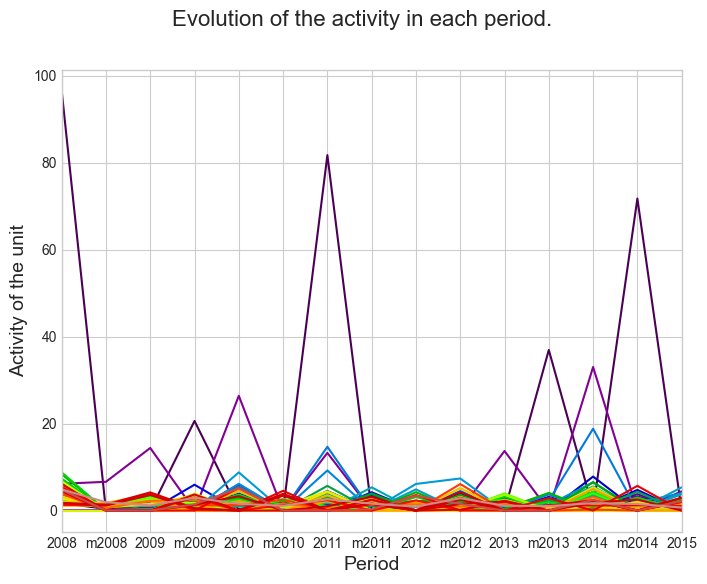

In [6]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of the activity in each period.', size = 16)

for i in range(economy.sectors):
    ax.plot(periods[: plan.periods], planned_economy.activity[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Activity of the unit', size = 14)

plt.savefig(join('figures', 'unit_activity.png'))

### Production

Note that a period with negative production means that more product was used than supplied.

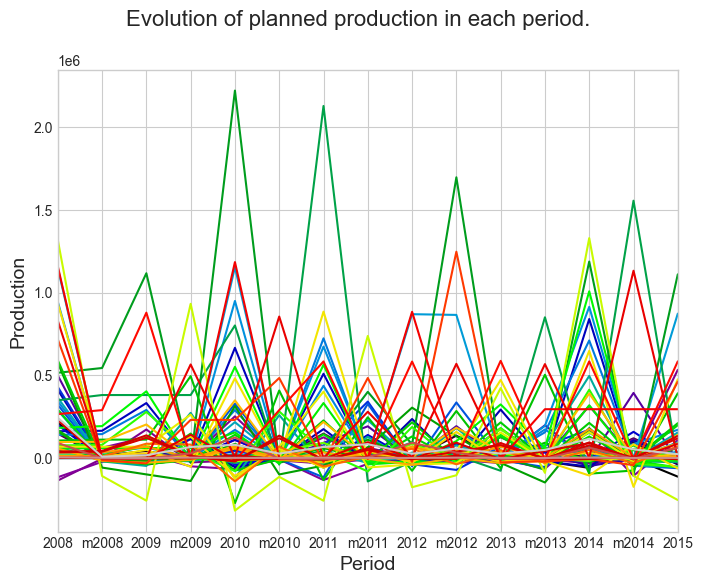

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of planned production in each period.', size = 16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], planned_economy.production[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Production', size = 14)

plt.savefig(join('figures', 'planned_prod.png'))

### Excess production

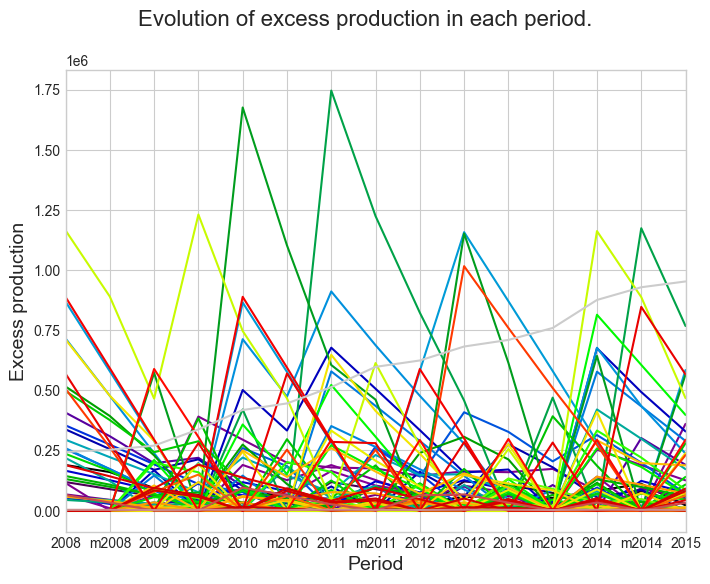

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of excess production in each period.', size = 16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], planned_economy.surplus[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Excess production', size = 14)

plt.savefig(join('figures', 'excess_prod.png'))

Note how carbon dioxide keeps rising since it is not used.

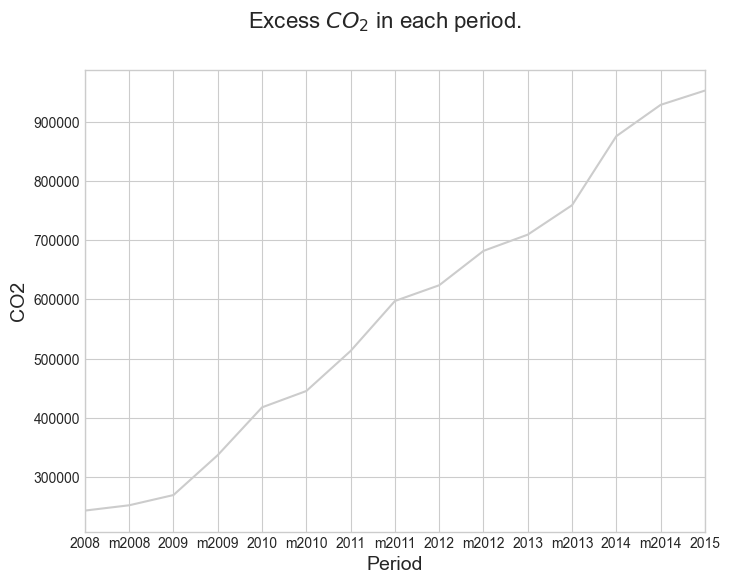

In [9]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle(r'Excess $CO_2$ in each period.', size = 16)

ax.plot(periods[: plan.periods], planned_economy.surplus[59, :], c=colors[59, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel(economy.product_names[59], size = 14)

plt.savefig(join('figures', 'excess_co2.png'))

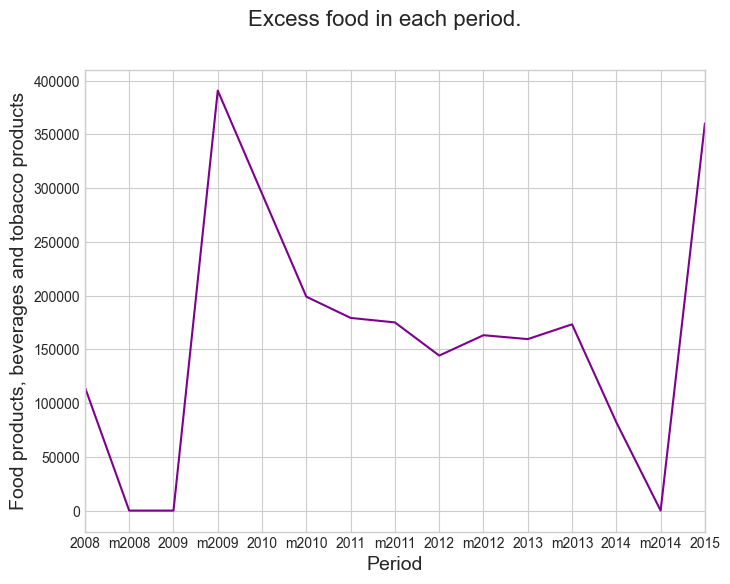

In [10]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Excess food in each period.', size = 16)

ax.plot(periods[: plan.periods], planned_economy.surplus[4, :], c=colors[4, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel(economy.product_names[4], size = 14)

plt.savefig(join('figures', 'excess_food.png'))

### Imported final goods

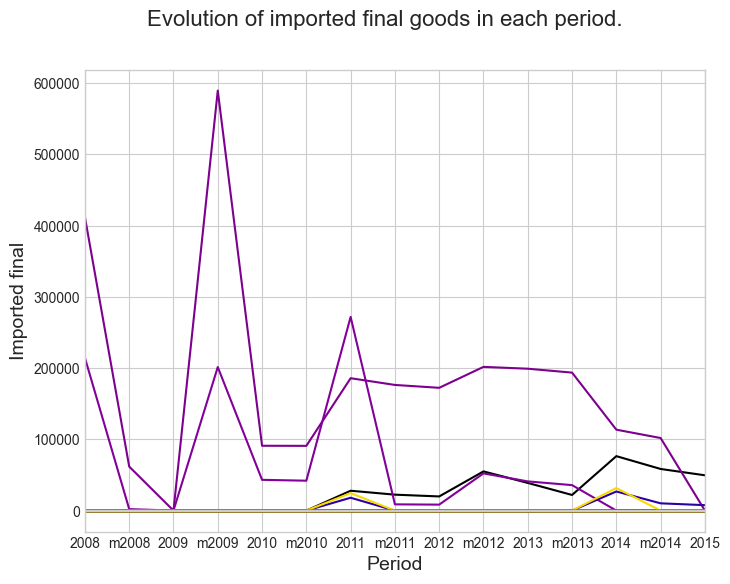

In [11]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of imported final goods in each period.', size = 16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], planned_economy.final_import[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Imported final', size = 14)

plt.savefig(join('figures', 'planned_prod.png'))

### Export deficit

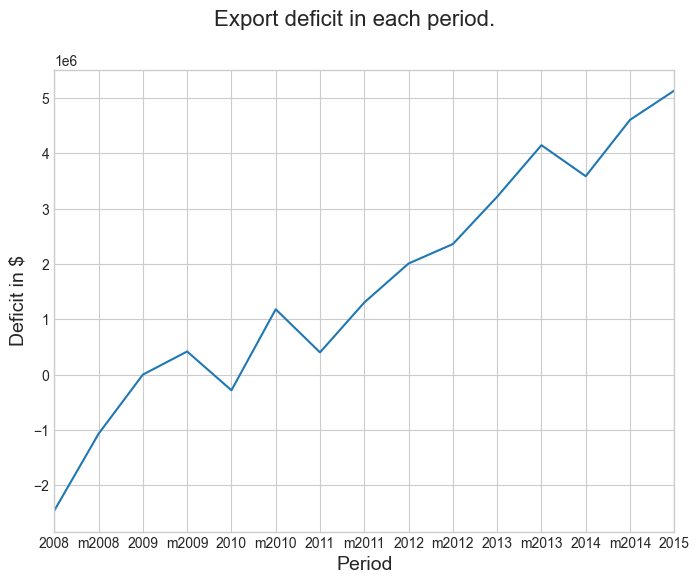

In [12]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Export deficit in each period.', size = 16)

ax.plot(periods[: plan.periods], planned_economy.export_deficit)

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Deficit in $', size = 14)

plt.savefig(join('figures', 'export_deficit.png'))

### Total worked hours

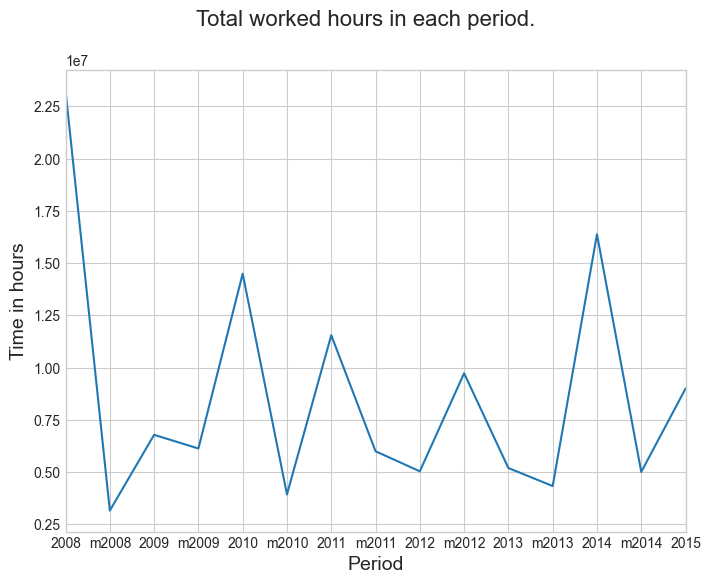

In [13]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Total worked hours in each period.', size = 16)

ax.plot(periods[: plan.periods], planned_economy.worked_hours)

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Time in hours', size = 14)

plt.savefig(join('figures', 'worked_hours.png'))